In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ttest_ind, f_oneway, chi2_contingency, levene
from statsmodels.graphics.gofplots import qqplot
import gdown

In [ ]:
!gdown 1qpNmSyGKR_gAydBGUyiXvR9cxQM89GFf

Downloading...
From: https://drive.google.com/uc?id=1qpNmSyGKR_gAydBGUyiXvR9cxQM89GFf
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 125MB/s]


In [ ]:
df = pd.read_csv('bike_sharing.csv')

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
df['season'].unique()

array([1, 2, 3, 4])

In [ ]:
df['holiday'].unique()

array([0, 1])

In [ ]:
df['workingday'].unique()

array([0, 1])

In [ ]:
df['weather'].unique()

array([1, 2, 3, 4])

In [ ]:
df.shape

(10886, 12)

##Column Profiling:

1. datetime: datetime
2. season: season (1: spring, 2: summer, 3: fall, 4: winter)
3. holiday: whether day is a holiday is 1 or not holiday is 0 (extracted from http://dchr.dc.gov/page/holiday-schedule)
4. workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
5. weather:
- 1: Clear, Few clouds, partly cloudy, partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
6. temp: temperature in Celsius
7. atemp: feeling temperature in Celsius
8. humidity: humidity
9. windspeed: wind speed
10. casual: count of casual users
11. registered: count of registered users
12. count: count of total rental bikes including both casual and registered

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Insights
- As you can see there are no null values

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Uni-variate Analysis

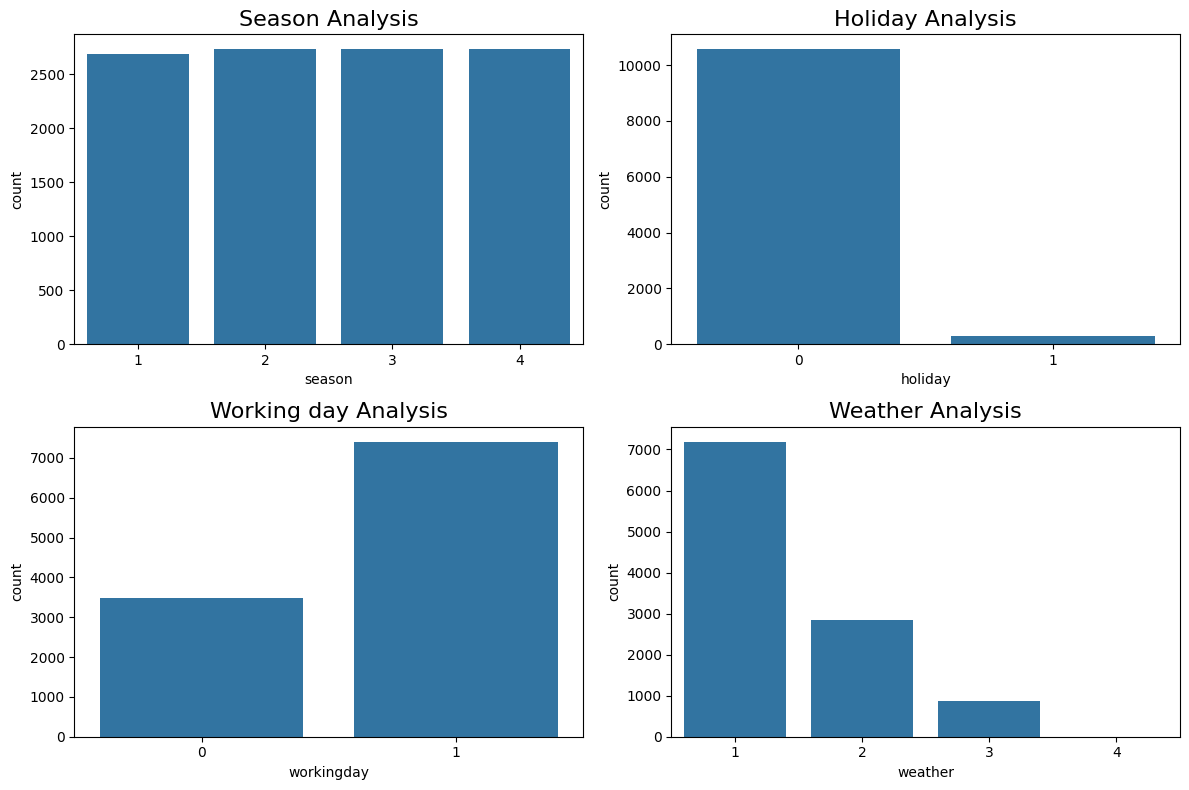

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(data=df, x='season')
plt.title('Season Analysis', fontsize=16)

plt.subplot(2,2,2)
sns.countplot(data=df, x='holiday')
plt.title('Holiday Analysis', fontsize=16)

plt.subplot(2,2,3)
sns.countplot(data=df, x='workingday')
plt.title('Working day Analysis', fontsize=16)

plt.subplot(2,2,4)
sns.countplot(data=df, x='weather')
plt.title('Weather Analysis', fontsize=16)

plt.tight_layout()
plt.show()

## Observations
- Season: Data is evenly distributed among the four seasons.
- Holiday: Bike rentals are higher on weekdays compared to holidays.
- Workingday: Bike rentals are higher on working days compared to non-working days.
- Weather: Most bike rentals occur during clear or partly cloudy weather, while rentals decrease during heavy rain or thunderstorms.

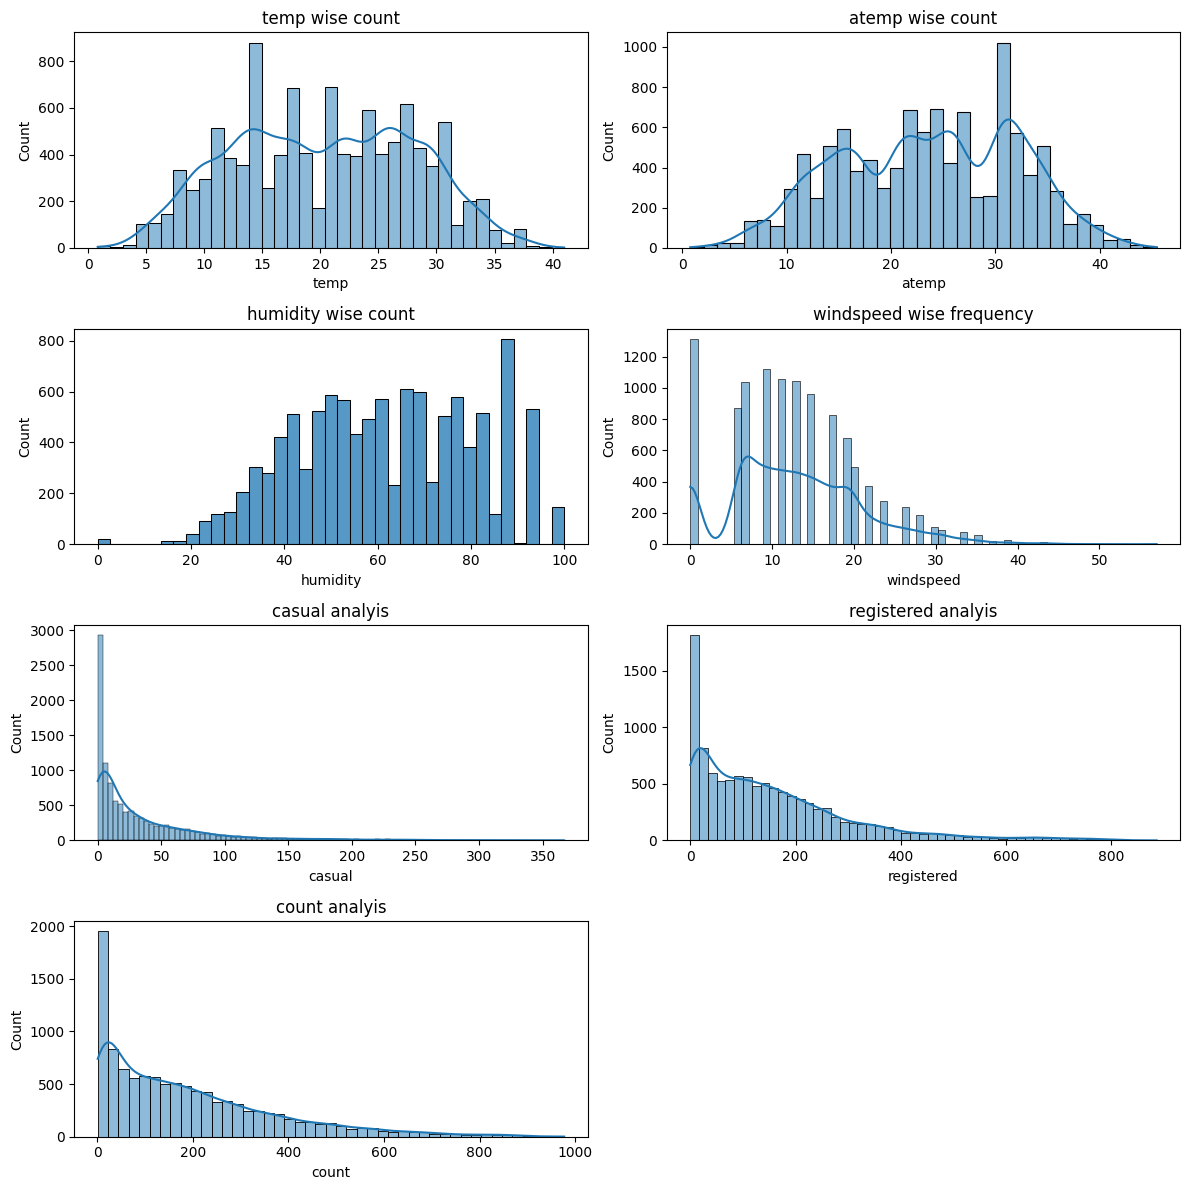

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(4, 2, 1)
sns.histplot(data = df, x = 'temp', kde = True)
plt.title('temp wise count')

plt.subplot(4, 2, 2)
sns.histplot(data = df, x = 'atemp', kde = True)
plt.title('atemp wise count')

plt.subplot(4, 2, 3)
sns.histplot(data = df, x = 'humidity')
plt.title('humidity wise count')

plt.subplot(4, 2, 4)
sns.histplot(data = df, x = 'windspeed', kde = True)
plt.title('windspeed wise frequency')

plt.subplot(4, 2, 5)
sns.histplot(data = df, x = 'casual', kde = True)
plt.title('casual analyis')

plt.subplot(4, 2, 6)
sns.histplot(data = df, x = 'registered', kde = True)
plt.title('registered analyis')

plt.subplot(4, 2, 7)
sns.histplot(data = df, x = 'count', kde = True)
plt.title('count analyis')

plt.tight_layout()
plt.show()

##Observation
- temp: Temperature is highest in Season 3, which is the season when most cycles are rented.
- Humidity: Humidity is highest in season 3, which is the season when most cycles are rented.
- Windspeed: Windspeed is lowest in season 3, which is the season when most cycles are rented.
- Casual: Count of casual cycles rented falls during the weekdays and maximizes on weekends.
- Registered: Count of registered cycles rented maximizes during weekdays and falls in number on weekends.

- We can see that the variables - Casual, Registered and Count are skewed to the right.

# Bi-Variate Analysis

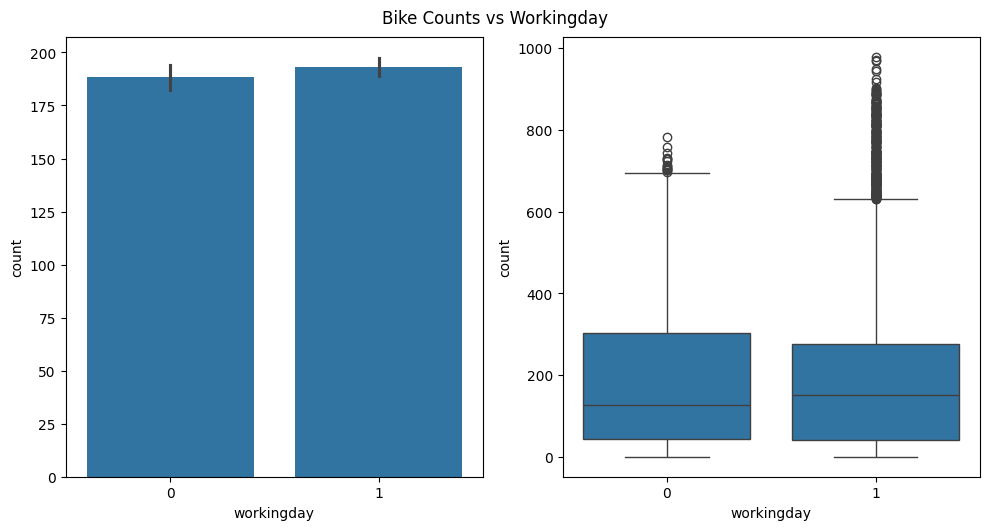

In [ ]:
plt.figure(figsize = (10,10)).suptitle('Bike Counts vs Workingday')

plt.subplot(2,2,1)
sns.barplot(data = df, x = 'workingday', y = 'count')

plt.subplot(2,2,2)
sns.boxplot(data = df, x = 'workingday', y = 'count')

plt.tight_layout()
plt.show()

In [ ]:
df.groupby(['workingday'])[['count']].mean()

,count
workingday,
0,188.506621
1,193.011873


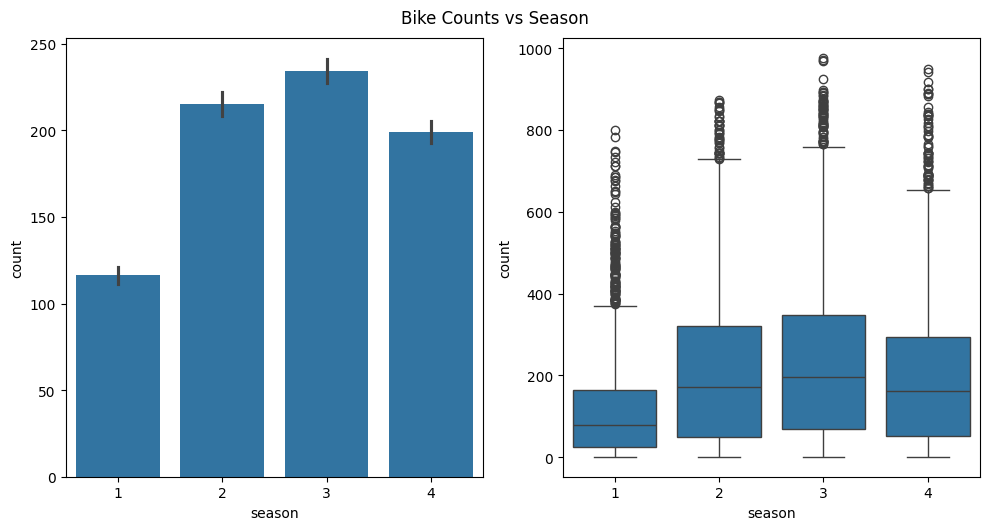

In [ ]:
plt.figure(figsize = (10,10)).suptitle('Bike Counts vs Season')
plt.subplot(2,2,1)
sns.barplot(data = df, x = 'season', y = 'count')

plt.subplot(2,2,2)
sns.boxplot(data = df, x = 'season', y = 'count')

plt.tight_layout()
plt.show()

In [ ]:
df.groupby(['season'])[['count']].mean()

,count
season,
1,116.343261
2,215.251372
3,234.417124
4,198.988296


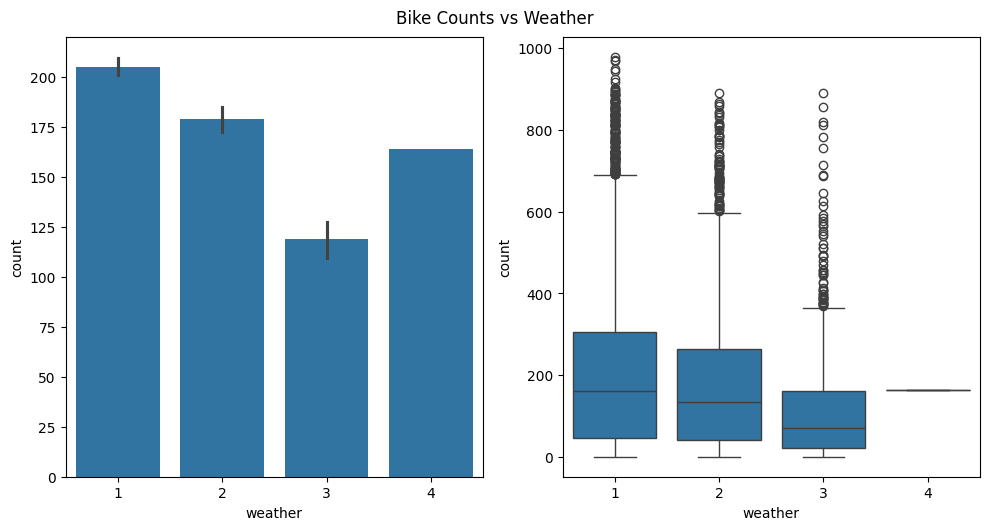

In [ ]:
plt.figure(figsize = (10,10)).suptitle('Bike Counts vs Weather')

plt.subplot(2,2,1)
sns.barplot(data = df, x = 'weather', y = 'count')

plt.subplot(2,2,2)
sns.boxplot(data = df, x = 'weather', y = 'count')

plt.tight_layout()
plt.show()

In [ ]:
df.groupby(['weather'])[['count']].mean()

,count
weather,
1,205.236791
2,178.955540
3,118.846333
4,164.000000


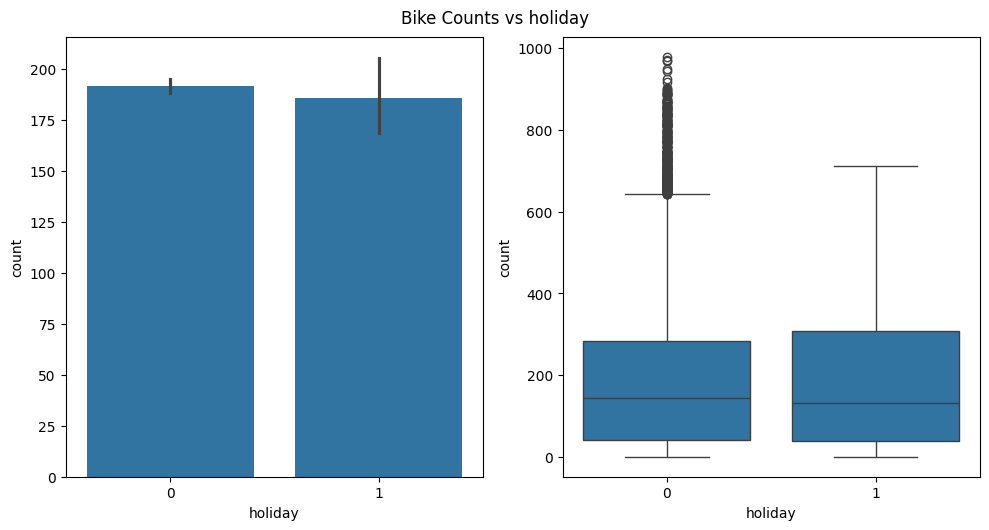

In [ ]:
plt.figure(figsize = (10,10)).suptitle('Bike Counts vs holiday')

plt.subplot(2,2,1)
sns.barplot(data = df, x = 'holiday', y = 'count')

plt.subplot(2,2,2)
sns.boxplot(data = df, x = 'holiday', y = 'count')

plt.tight_layout()
plt.show()

In [ ]:
df.groupby(['holiday'])[['count']].mean()

,count
holiday,
0,191.741655
1,185.877814


## Observations

Bike Counts vs Working day:
- From this bar plot we can observe that the mean counts of total counts of registered and casual users are  almost the same on working day and non-working day.
- From the box plot we can infer that there are more outliers in our counts of registered and casual user on the working day than there are on the non-working day.

Bike Counts vs Season:
- From the bar plot we can see that the lowest mean value of the total counts of registered and casual users is season 1 and highest mean value is season 2.
- From the box plot we can see that we have outliers in every season.

Bike Counts vs Weather:
- From the bar plot we can see that the lowest mean value of the total counts of registered and casual users is weather 3 and highest mean is season 1.
- From the box plot we can see that we have outliers in every weather except weather 4.

Bike Counts vs Holiday:
- From the bar plot we can see that the counts of registered and casual users are almost same in holoday and not holiday.
- From the box plot we can see that we dont have any outliers in holidays.

# Hypothesis Testing


## Check if Working Day has effect on number of electric cycles rented.

### QQ-Plot for Distribution check.

In [ ]:
working = df[df['workingday']== 1]
no_working = df[df['workingday']== 0]

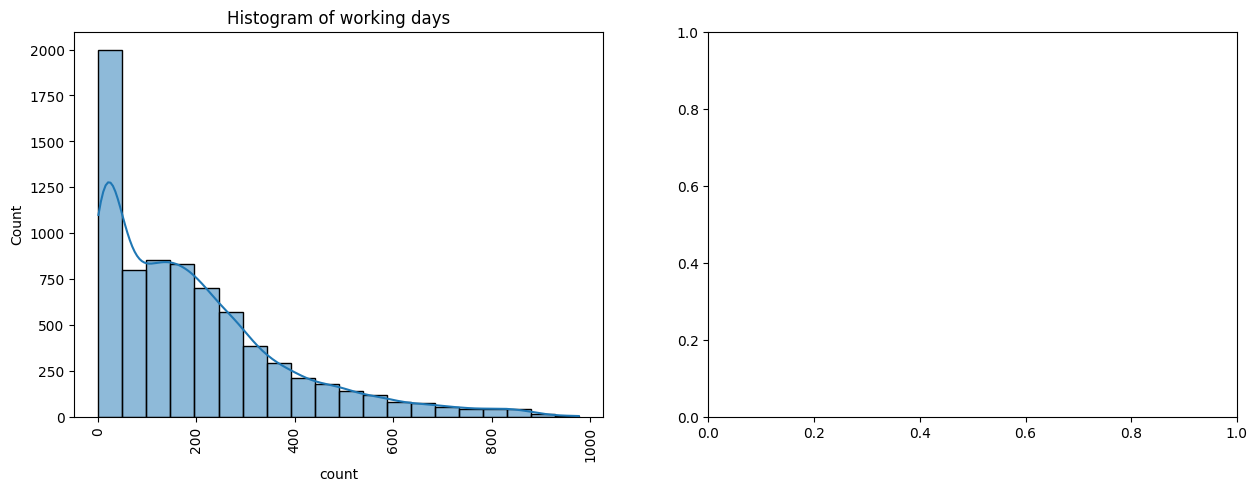

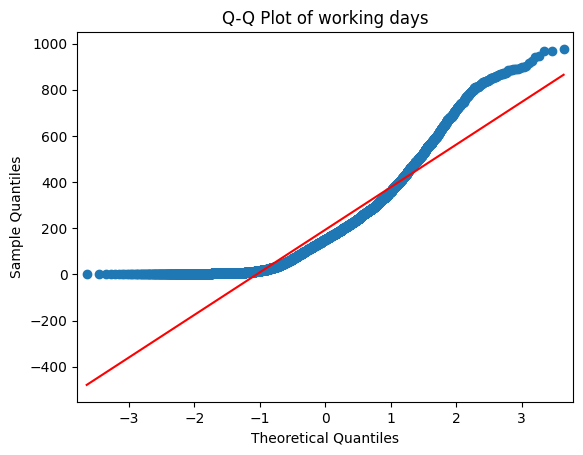

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(working['count'], bins=20, kde=True)
plt.title('Histogram of working days')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
qqplot(working['count'], line='s')
plt.title('Q-Q Plot of working days')

plt.show()

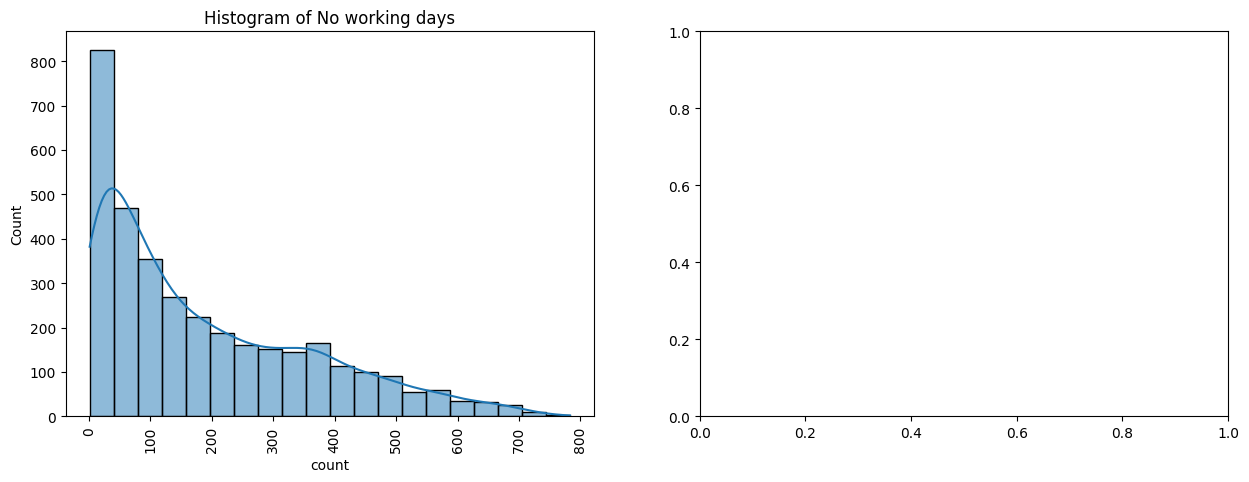

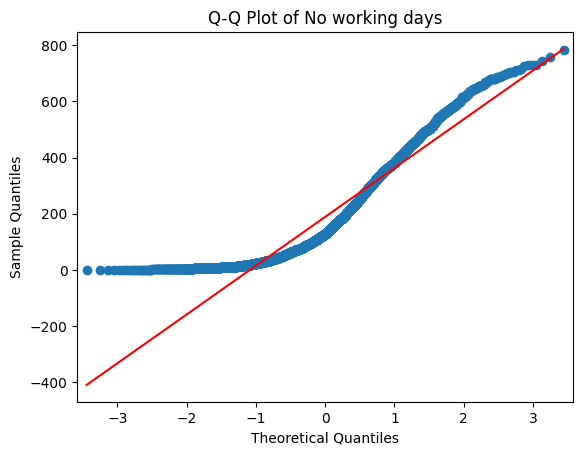

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(no_working['count'], bins=20, kde=True)
plt.title('Histogram of No working days')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
qqplot(no_working['count'], line='s')
plt.title('Q-Q Plot of No working days')

plt.show()

### Q-Q Plot shows that our data is not gaussian.

### Levene's test

- H0: Variance is same

- Ha: Variance is different

In [ ]:
count_working = df[df['workingday'] == 1]['count']
count_no_working = df[df['workingday'] == 0]['count']

In [ ]:
stat,p_value = levene(count_working,count_no_working)
print('P-value :',p_value)

if p_value < 0.05:
    print('Reject null hypothesis: variance is different')
else:
    print('Fail to reject null hypothesis: variance is same ')

P-value : 0.9437823280916695
Fail to reject null hypothesis: variance is same 


### 2-sample t-test

In [ ]:
working_mean= df[df['workingday'] == 1]['count'].mean()
no_working_mean= df[df['workingday'] == 0]['count'].mean()
print('working_mean:', working_mean)
print('no_working_mean:', no_working_mean)

working_mean: 193.01187263896384
no_working_mean: 188.50662061024755


In [ ]:
working_std= df[df['workingday'] == 1]['count'].std()
no_working_std = df[df['workingday'] == 0]['count'].std()
print('working_std:', working_std)
print('no_working_std:', no_working_std)

working_std: 184.5136590421481
no_working_std: 173.7240153250003


Null Hypothesis (H0): Working Day has no affect on the number of cycles rented

Alternate Hypothesis (Ha): Working Day has an affect on the number of cycles rented

In [ ]:
stats, p = ttest_ind(count_working, count_no_working)
print(f'p-value: {p}')
if p < 0.05:
    print('Reject null hypothesis: Working Day has an affect on the number of cycles rented')
else:
    print('Fail to reject null hypothesis: Working Day has no affect on the number of cycles rented')

p-value: 0.22644804226361348
Fail to reject null hypothesis: Working Day has no affect on the number of cycles rented


## Check if no. of cycles rented similar or different in different seasons.


### QQ-Plot for Distribution check

In [ ]:
season1 = df[df['season'] == 1]
season2 = df[df['season'] == 2]
season3 = df[df['season'] == 3]
season4 = df[df['season'] == 4]

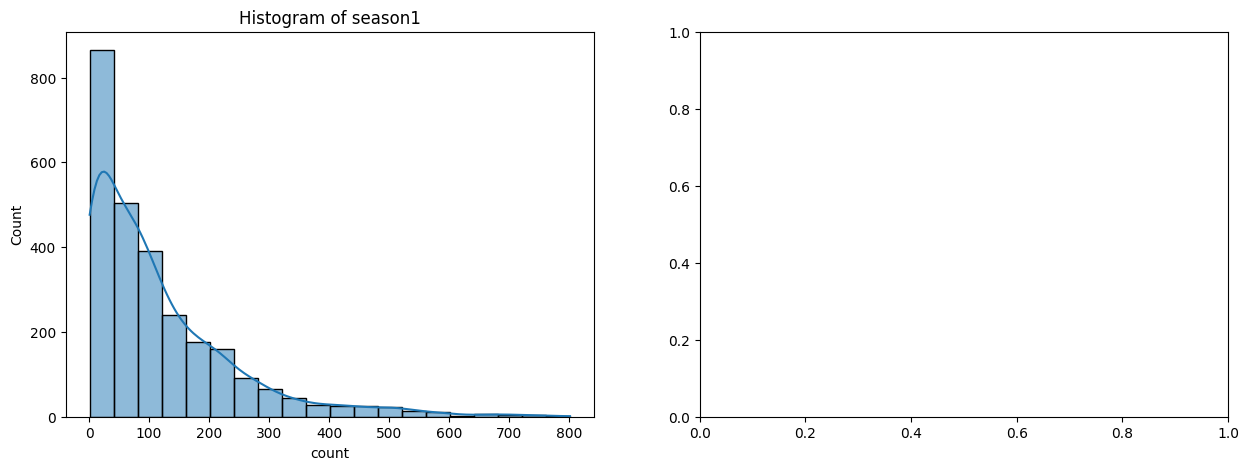

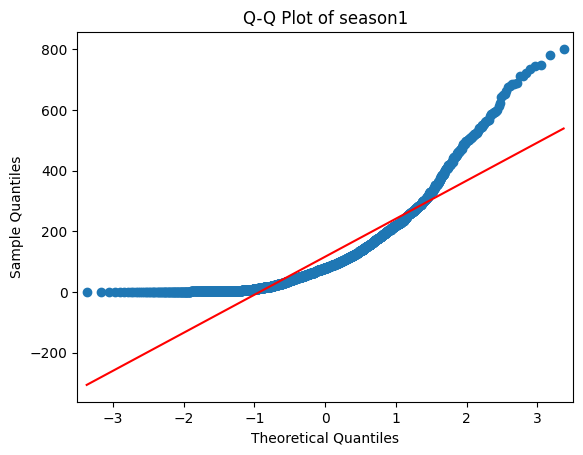

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(season1['count'], bins=20, kde= True)
plt.title('Histogram of season1')

plt.subplot(1, 2, 2)
qqplot(data= season1['count'], line='s')
plt.title('Q-Q Plot of season1')

plt.show()

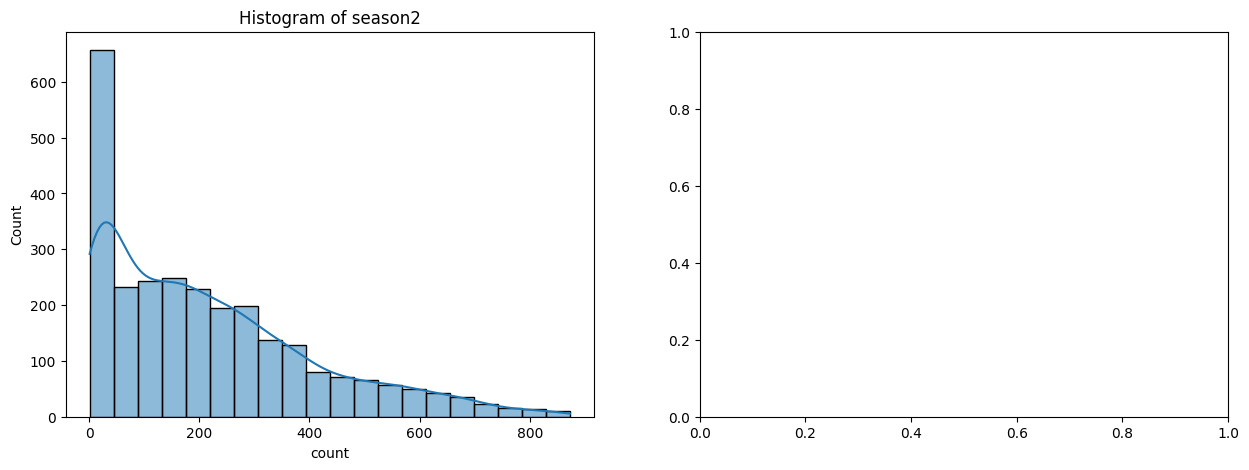

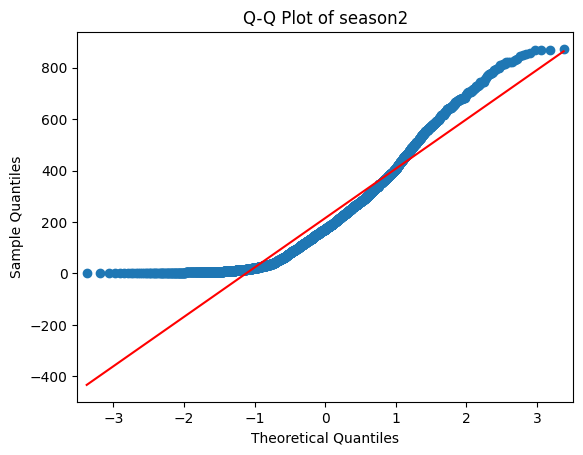

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(season2['count'], bins=20, kde= True)
plt.title('Histogram of season2')

plt.subplot(1, 2, 2)
qqplot(data= season2['count'], line='s')
plt.title('Q-Q Plot of season2')

plt.show()

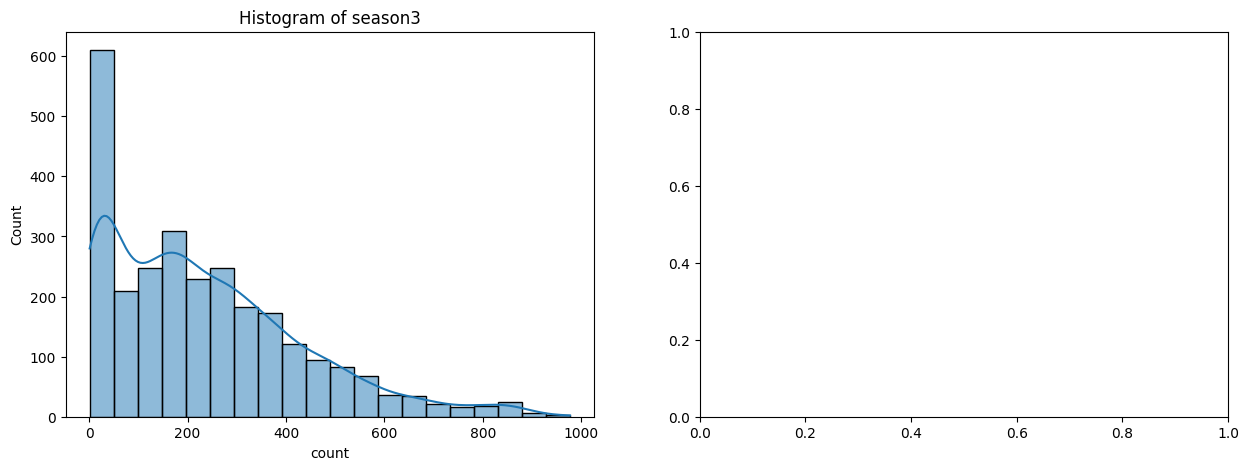

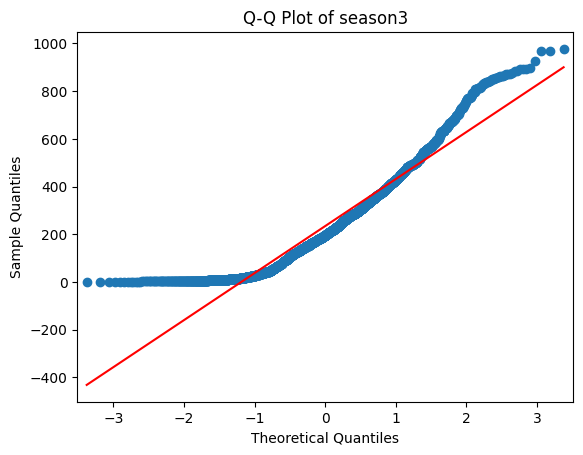

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(season3['count'], bins=20, kde= True)
plt.title('Histogram of season3')

plt.subplot(1, 2, 2)
qqplot(data= season3['count'], line='s')
plt.title('Q-Q Plot of season3')

plt.show()

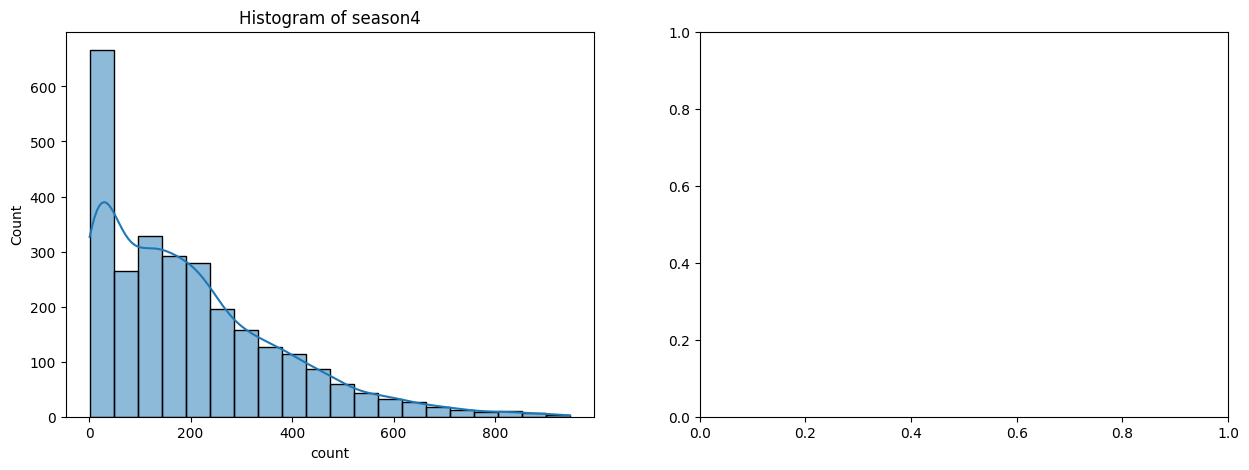

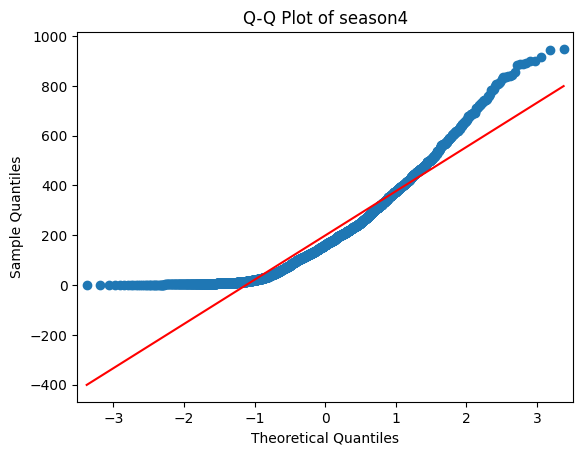

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(season4['count'], bins=20, kde= True)
plt.title('Histogram of season4')

plt.subplot(1, 2, 2)
qqplot(data= season4['count'], line='s')
plt.title('Q-Q Plot of season4')

plt.show()

### Q-Q Plot shows that our data is not gaussian.

## Levene's Test

- H0: variance is same

- Ha: variance is different

In [ ]:
season1_count = df[df['season'] == 1]['count']
season2_count = df[df['season'] == 2]['count']
season3_count = df[df['season'] == 3]['count']
season4_count = df[df['season'] == 4]['count']

In [ ]:
stat,p_value = levene(season1_count,season2_count,season3_count,season4_count)
print('P-value :',p_value)

if p_value < 0.05:
    print('Reject null hypothesis: variance is different')
else:
    print('Fail to reject null hypothesis: variance is same ')

P-value : 1.0147116860043298e-118
Reject null hypothesis: variance is different


## One-Way Anova

- Null Hypothesis ( H0 ) - No. of cycle rented is same for season 1,2,3 and 4 are same.

- Alternate Hypothesis ( HA ) - No. of cycle rented is same for season 1,2,3 and 4 are different.

In [ ]:
stat, p_value = f_oneway(season1_count, season2_count, season3_count, season4_count)
print('P-value:', p_value)

if p_value < 0.05:
    print('Reject null hypothesis: The number of cycles rented is different across seasons.')
else:
    print('Fail to reject null hypothesis: The number of cycles rented is the same across seasons.')

P-value: 6.164843386499654e-149
Reject null hypothesis: The number of cycles rented is different across seasons.


## Check if no. of cycles rented similar or different in different weather.

### QQ-Plot for Distribution check

In [ ]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [ ]:
weather1 = df[df['weather'] == 1]
weather2 = df[df['weather'] == 2]
weather3 = df[df['weather'] == 3]

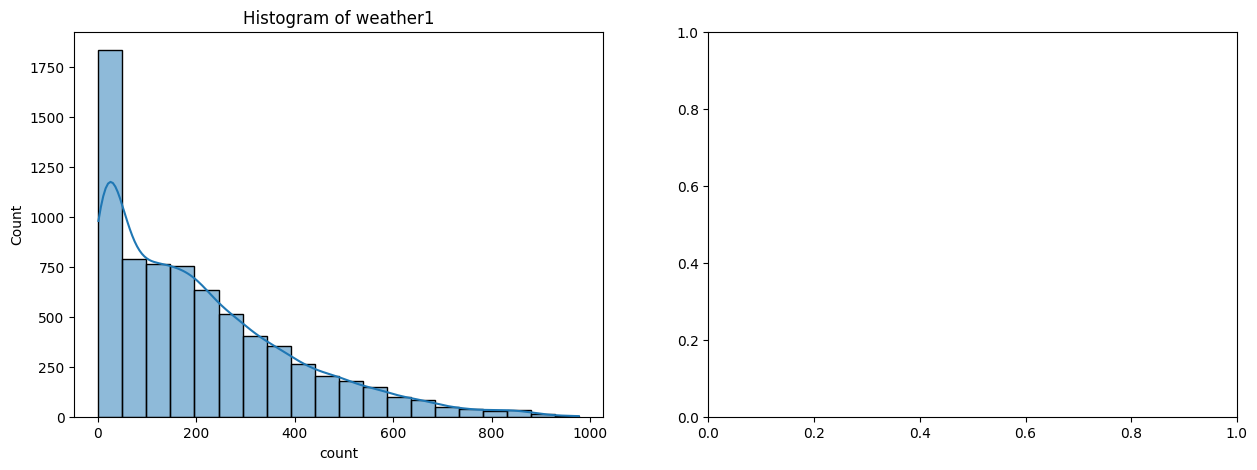

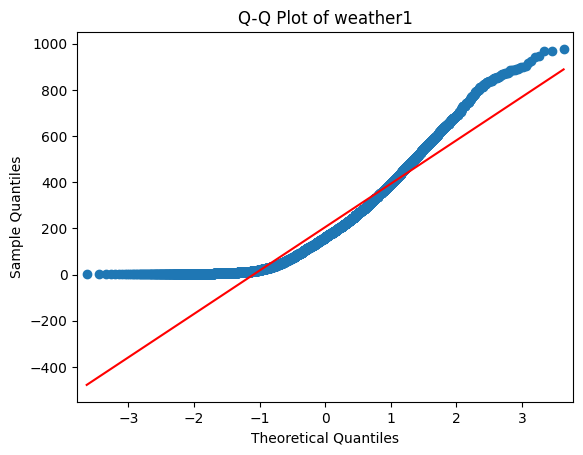

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(weather1['count'], bins=20, kde= True)
plt.title('Histogram of weather1')

plt.subplot(1, 2, 2)
qqplot(data= weather1['count'], line='s')
plt.title('Q-Q Plot of weather1')

plt.show()

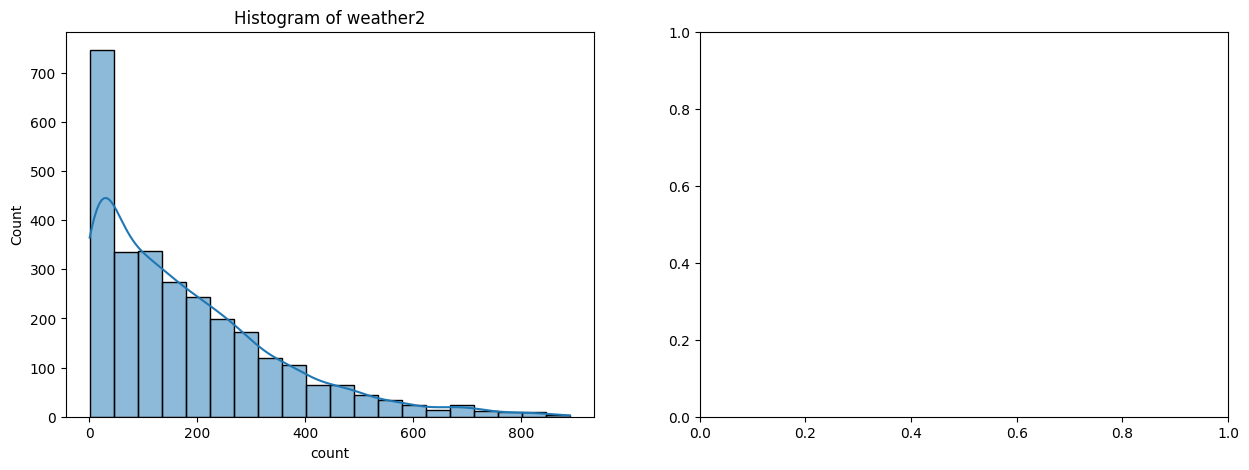

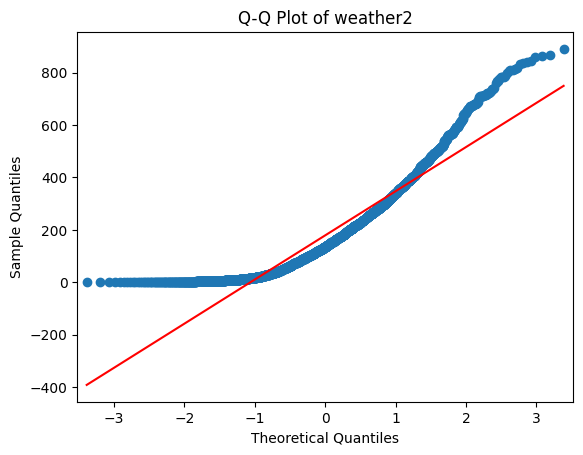

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(weather2['count'], bins=20, kde= True)
plt.title('Histogram of weather2')

plt.subplot(1, 2, 2)
qqplot(data= weather2['count'], line='s')
plt.title('Q-Q Plot of weather2')

plt.show()

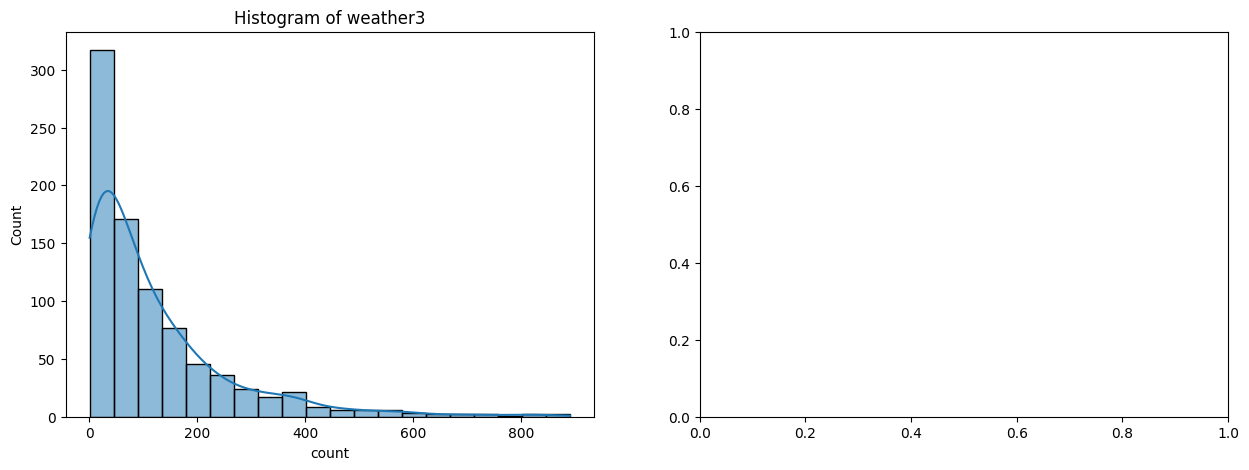

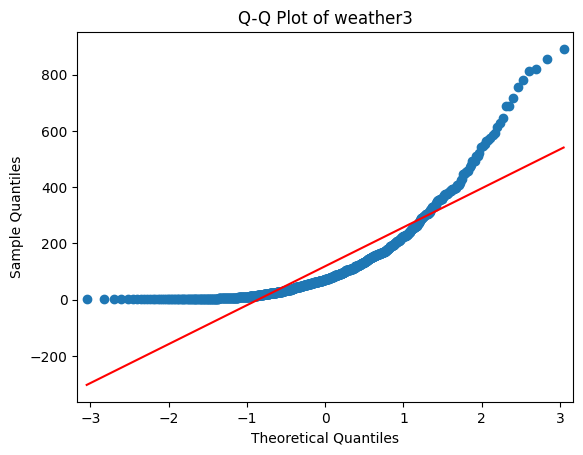

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(weather3['count'], bins=20, kde= True)
plt.title('Histogram of weather3')

plt.subplot(1, 2, 2)
qqplot(data= weather3['count'], line='s')
plt.title('Q-Q Plot of weather3')

plt.show()

## Levene's Test

- H0: variance is same

- Ha: variance is different

In [ ]:
weather1_count = df[df['weather'] == 1]['count']
weather2_count = df[df['weather'] == 2]['count']
weather3_count = df[df['weather'] == 3]['count']

In [ ]:
stat,p_value = levene(weather1_count, weather2_count, weather3_count)
print('P-value :',p_value)

if p_value < 0.05:
    print('Reject null hypothesis: variance is different')
else:
    print('Fail to reject null hypothesis: variance is same ')

P-value : 6.198278710731511e-36
Reject null hypothesis: variance is different


## Annova Test

- H0: No. of cycle rented is same for weather 1, 2 and 3

- Ha: No. of cycle rented for weather 1, 2 and 3 are different

In [ ]:
stats, p = f_oneway(weather1_count, weather2_count, weather3_count)
print('P-value :', p_value)

if p < 0.05:
    print('Reject null hypothesis: No. of cycle rented for weather 1, 2 and 3 are different')
else:
    print('fail to reject null hypothesis: No. of cycle rented is same for weather 1, 2 and 3')

P-value : 6.198278710731511e-36
Reject null hypothesis: No. of cycle rented for weather 1, 2 and 3 are different


## Check if weather is dependent on season (check between 2 predictor variable).

- H0: weather is independent of season

- Ha: weather depends on season

In [ ]:
contingency_table = pd.crosstab(df['season'], df['weather'])
contingency_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
stats, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'p-value: {p}')

if p < 0.05:
    print('Reject null hypothesis: weather depends on season')
else:
    print('Fail to reject null hypothesis: weather is independent of season')

p-value: 4.976448509904196e-43
Reject null hypothesis: weather depends on season


# Insights

- During the summer and fall seasons, there is a noticeable increase in bike rentals compared to other seasons.
- Bike rentals tend to rise significantly during holidays.
- Analysis of working days reveals that bike rentals are slightly higher on holidays and weekends.
- Inclement weather conditions such as rain, thunderstorms, snow, or fog are associated with a decrease in bike rentals.
- When humidity levels drop below 20%, bike rentals decrease significantly.
- Lower temperatures, particularly below 10°C, correlate with a reduction in bike rentals.
- High winds, specifically exceeding 35 km/h, are associated with a decrease in bike rentals.

# Recommendations

- During the summer and fall seasons, it's advisable for the company to maintain a higher inventory of bikes available for rental, as demand tends to peak during these periods compared to others.
- Based on a significance level of 0.05, there's no observable impact of working days on the rental volume of bikes.
- On days with extremely low humidity, it's recommended to reduce the number of bikes available for rental in the inventory.
- In colder conditions, particularly when the temperature drops below 10°C, it's prudent for the company to adjust its bike inventory downwards.
- During periods of high winds exceeding 35 km/h or during thunderstorms, it's advisable to reduce the number of bikes available for rental in the inventory.